# Método de Euler: Crecimiento de poblaciones.

**Objetivo general.**

Aplicar los conceptos vistos en clase para resolver un problema de crecimiento de una población aplicando el Método de Euler hacia adelante.

**Objetivos particulares.**
- Definir los pasos a seguir a partir de la lista de cotejo.
- Hacer uso de las herramientas numéricas y de graficaciónd e Python para resolver el problema.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/repomacti/macti/tree/main/notebooks/Analisis_Numerico_01">MACTI-Analisis_Numerico_01</a> by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101922**

## Contenido
- [1. Introducción.](#1)
- [Ejercicio 1. Solución de un problema con el método de Euler](#ej-1)
    - [Lista de cotejo](#ej-1-lista)
- [Solución.](#2)
    - [Definición de los parámetros del problema.](#2-1)
    - [Descripción del algoritmo de solución para una $N_t$ fija.](#2-2)
    - [Implementación del algoritmo de solución para una $N_t$ fija.](#2-3)
    - [Descripción e implementación del algoritmo de solución para $N_t$ variable.](#2-4)
    - [Reproducción de la gráfica.](#2-5)

<a name='1'></a>
## Introducción
En el estudio de crecimiento de poblaciones, limitadas por competencia por alimentos, se tiene un modelo matemático conocido como la ecuación logística:

$$
\begin{eqnarray*}
	\frac{d y(t)}{d t} & = & \lambda y ( 1 -y), \qquad \text{ para }  0 < t  < T_{max} \\
	y(0) & = & y_0 \qquad \text{(condición inicial)}
\end{eqnarray*}
$$

donde $y_0$ es la población inicial, $\lambda > 0$ y $T_{max} = h_t * N_t$. 

Obsérvese que en este caso la ecuación es no lineal pues del lado derecho aparece un término cuadrático de $y$.

Este problema tiene la siguiente solución analítica: $y(t) = \dfrac{y_0}{y_0 + (1-y_0)e^{-\lambda t}}$.

---
<a name='ej-1'></a>
## **<font color="DodgerBlue">Ejercicio 1. Solución de un problema con el método de Euler.</font>**

- <font color="DarkBlue"> Escribir la fórmula del método de Euler hacia adelante para este caso.</font>
- <font color="DarkBlue"> Diseñar e implementar un algoritmo para calcular la solución.</font>
- <font color="DarkBlue"> Reproducir la gráfica que se muestra en la siguiente figura para: $\lambda = 10$, $T_{max} = 1.0$, $y_0 = 0.01$ y $N_t = 4$, $16$ y $64$.</font>

<center>
<img src="../utils/figs/logistica.png"  width='500px'/>
</center>

---

<a name='ej-1-lista'></a>
### Lista de cotejo.

1. Definición de los parámetros del problema.
2. Descripción del algoritmo de solución para una $N_t$ fija.
3. Implementación del algoritmo de solución para una $N_t$ fija.
4. Descripción e implementación del algoritmo de solución para $N_t$ variable.
6. Reproducción de la gráfica.
5. Comparación con la solución analítica, de manera numérica y gráfica, en los puntos 3 y 4.

<a name="2"></a>
## Solución

In [1]:
import matplotlib.pyplot as plt
import numpy as np

<a name="2-1"></a>
### Definición de los parámetros del problema.

In [2]:
# Valores de los parámetros
#λ    = ... 
#Tmax = ...
#y0   = ...
#Nt   = ...

### BEGIN SOLUTION
λ    = 10.0 # 
Tmax = 1.0  # Tiempo máximo de simulación.
y0   = 0.01 # Condición inicial. 
Nt   = [4, 16, 64] # Pasos de tiempo para los tres casos.
### END SOLUTION

<a name="2-3"></a>
### Implementación del algoritmo de solución para una $N_t$ fija.

Error numérico : 0.74879


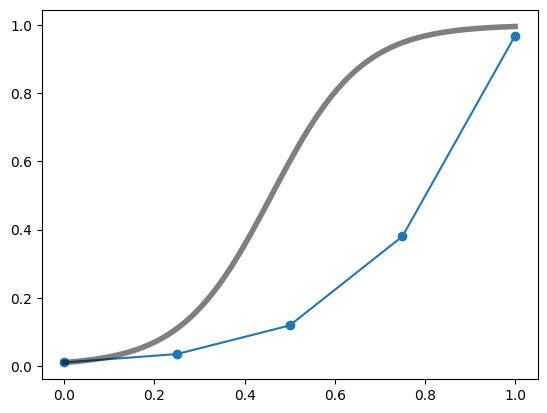

In [3]:
# Código para el cálculo de la solución analítica
# 
# A continuación implemente su algoritmo
# Use:
# t :para el arreglo con los pasos de tiempo
# ht : para el paso de tiempo
# y0 : para el valor inicial
# y : para almacenar la solución
# ye : para la solución exacta
# error : para almacenar el error (norma L-2)

### BEGIN SOLUTION
ht = Tmax / Nt[0]
t  = np.linspace(0, Tmax, Nt[0]+1)
y  = [y0]

# Cálculo de la solución exacta
ye = y0 /(y0 + (1-y0) * np.exp(-λ * t) )

# Función f(t,y)
f = lambda y : λ * y * (1 - y)

for n in range(0, Nt[0]):
    ynew = y[n] + ht * f(y[n]) # Método de Euler hacia adelante
    y.append(ynew)             # Agregamos el valor calculado al arreglo

error = np.linalg.norm(y - ye, 2)
### END SOLUTION

print('Error numérico : {:0.5f}'.format(error))

# Imprimimos y graficamos la solución
plt.plot(t, y, 'o-')

# Cálculo de la solución exacta para graficarla
te = np.linspace(0, Tmax, 100)
ye = y0 /(y0 + (1-y0) * np.exp(-λ * te) )
plt.plot(te, ye, 'k-', lw=4, alpha=0.5)

<a name="2-4"></a>
### Descripción e implementación del algoritmo de solución para $N_t$ variable y que reproduzca la gráfica anterior.

Agregue una imagen del algoritmo.

**Hint**: Defina una función como la que sigue para realizar los cálculos para una $N_t$ dada:

```python
def solLogistica(λ, y0, Tmax, i):
    ...
    return t, y, error
```
En esta función debe determinar que variable(s) dependen del índice `i`.

In [4]:
# Función que calcula la solución
#

### BEGIN SOLUTION
def solLogistica(λ, y0, Tmax, i):
    ht = Tmax / Nt[i]
    t  = np.linspace(0, Tmax, Nt[i]+1)
    y  = [y0]

    # Cálculo de la solución exacta    
    ye = y0 /(y0 + (1-y0) * np.exp(-λ * t) )

    # Función f(t,y)
    f = lambda y : λ * y * (1 - y)

    for n in range(0, Nt[i]):
        ynew = y[n] + ht * f(y[n]) # Método de Euler hacia adelante
        y.append(ynew)             # Agregamos el valor calculado al arreglo

    error = np.linalg.norm(y - ye, 2)
    
    return t, y, error
### END SOLUTION

<a name="2-5"></a>
### Reproducción de la gráfica:

**Hint**: En la siguiente celda debe agregar un ciclo similar al siguiente:

```python
for i in range(0,3):
    t, y, e = solLogistica(...)
    ...
    plt.plot(...)
```

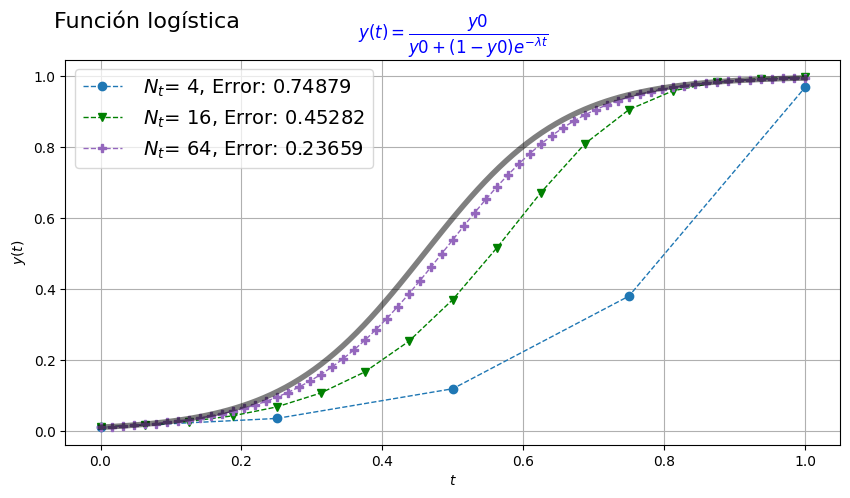

In [5]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Función logística', ha = 'right', va='top', x = 0.30, fontsize=16)

color =['C0', 'g', 'C4']
marca = ['o', 'v', 'P']

# Agrege un código que calcule la solución para Nt = 4, 16, 64
#
### BEGIN SOLUTION
for i in range(0,3):
    t, y, e = solLogistica(λ, y0, Tmax, i)
    Parametros = ' $N_t$' + '= {}'.format(Nt[i])
    Error = ', Error: {:6.5f}'.format(e)
    plt.plot(t, y, '--', c=color[i], marker=marca[i], lw = 1.0, label=Parametros + Error)
### END SOLUTION

plt.title('$y(t) = \dfrac{y0}{y0 + (1 -y0)e^{-\lambda t}}$', fontsize=12, color='blue')
plt.xlabel('$t$')
plt.ylabel('$y(t)$')

# Cálculo de la solución exacta para graficar
te = np.linspace(0, Tmax, 100)
ye = y0 /(y0 + (1-y0) * np.exp(-λ * te) )
plt.plot(te, ye, 'k-', lw=4, alpha=0.5)

plt.legend(loc='upper left', ncol=1, framealpha=0.75, fancybox=True, fontsize=14)
plt.grid()